In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

In [2]:
SEED = 1926
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
#hyperparametes
BATCH_SIZE = 256
MAX_EPOCHS = 50
LEARNING_RATE = 1e-3
MOMENTUM = 8e-1
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE)
VERBOSE = 1
#hyperparameters for CNNs
FILTERS = [32,32,16]

In [4]:
#load data from MNIST dataset and preprocess
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

In [5]:
#create noise to corrupt inputs
noise = 0.5
noise_train = np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = x_train + noise * noise_train
noise_test = np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = x_test + noise * noise_test
#saturate x between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
x_train_noisy = x_train_noisy.astype('float32')
x_test_noisy = x_test_noisy.astype('float32')

In [6]:
#istantiate vanilla autoencode
from Autoencoders import ConvAutoEncoder
conv_autoencoder = ConvAutoEncoder(filters = FILTERS)

In [7]:
#let's train the denoising autoencoder using Keras inbuilt functions
conv_autoencoder.compile(loss = 'binary_crossentropy', optimizer = OPTIMIZER)
history = conv_autoencoder.fit(x_train_noisy, x_train, validation_data = (x_test_noisy, x_test), epochs = MAX_EPOCHS, batch_size = BATCH_SIZE, verbose = VERBOSE)

Epoch 1/50
235/235 [==============================] - 122s 520ms/step - loss: 0.2530 - val_loss: 0.1793
Epoch 2/50
235/235 [==============================] - 123s 521ms/step - loss: 0.1635 - val_loss: 0.1489
Epoch 3/50
235/235 [==============================] - 131s 557ms/step - loss: 0.1444 - val_loss: 0.1370
Epoch 4/50
235/235 [==============================] - 140s 598ms/step - loss: 0.1352 - val_loss: 0.1306
Epoch 5/50
235/235 [==============================] - 120s 511ms/step - loss: 0.1296 - val_loss: 0.1267
Epoch 6/50
235/235 [==============================] - 126s 537ms/step - loss: 0.1260 - val_loss: 0.1238
Epoch 7/50
235/235 [==============================] - 118s 503ms/step - loss: 0.1233 - val_loss: 0.1207
Epoch 8/50
235/235 [==============================] - 121s 516ms/step - loss: 0.1213 - val_loss: 0.1187
Epoch 9/50
235/235 [==============================] - 128s 545ms/step - loss: 0.1192 - val_loss: 0.1174
Epoch 10/50
235/235 [==============================] - 131s 557m

In [8]:
conv_autoencoder.loss = history.history['loss']

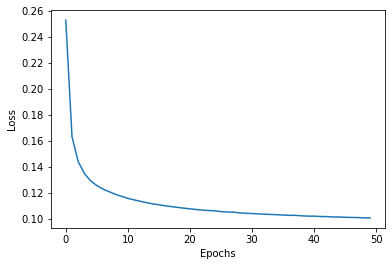

In [9]:
#plot loss vs epochs
conv_autoencoder.plot_loss()

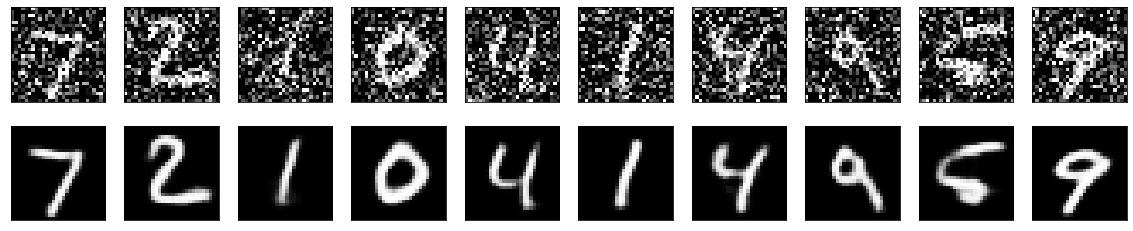

In [10]:
#### PLOT REAL VS RECONSTRUCTED IMAGES ###
conv_autoencoder.plot_real_vs_reconstructed(data = x_test_noisy)